# efficientNet model - fabric 데이터 학습시키기

## 1. 데이터 분류

In [25]:
import os
import shutil
import random

In [ ]:
# 폴더 생성
directory_list = [
    "dataset/train/",
    "dataset/test/"
]

for dir in directory_list:
    os.makedirs(dir)

In [ ]:
# 데이터셋 나누기
def dataset_split(src_dir, dst_dir, train_ratio=0.8, seed=42):
    random.seed(seed)

    # 클래스별 폴더 순회 (denim, silk, cotton ...)
    for i, folder in enumerate(os.listdir(src_dir)):
        folder_path = os.path.join(src_dir, folder)
        if not os.path.isdir(folder_path):
            continue  # 폴더가 아닐 경우 건너뜀

        # 이미지 파일 목록 가져오기
        images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        random.shuffle(images)

        # 8:2로 나누기
        split_idx = int(len(images) * train_ratio)
        train_imgs = images[:split_idx]
        test_imgs = images[split_idx:]

        # train/test 디렉토리 만들기
        for phase, img_list in [("train", train_imgs), ("test", test_imgs)]:
            phase_class_dir = os.path.join(dst_dir, phase, folder)
            os.makedirs(phase_class_dir, exist_ok=True)

            # 이미지 복사
            for img_name in img_list:
                src_path = os.path.join(folder_path, img_name)
                dst_path = os.path.join(phase_class_dir, img_name)
                shutil.copy(src_path, dst_path)
        print(f"{i}번째 {folder} 폴더 완료 ===== ")

In [5]:
src_dir = "./data/fabric"
dst_dir = "./dataset"
dataset_split(src_dir, dst_dir, train_ratio=0.8)

0번째 Acrylic 폴더 완료 ===== 
1번째 Artificial_fur 폴더 완료 ===== 
2번째 Artificial_leather 폴더 완료 ===== 
3번째 Blended 폴더 완료 ===== 
4번째 Chenille 폴더 완료 ===== 
5번째 Corduroy 폴더 완료 ===== 
6번째 Cotton 폴더 완료 ===== 
7번째 Crepe 폴더 완료 ===== 
8번째 Denim 폴더 완료 ===== 
9번째 Felt 폴더 완료 ===== 
10번째 Fleece 폴더 완료 ===== 
11번째 Leather 폴더 완료 ===== 
12번째 Linen 폴더 완료 ===== 
13번째 Lut 폴더 완료 ===== 
14번째 Nylon 폴더 완료 ===== 
15번째 Polyester 폴더 완료 ===== 
16번째 Satin 폴더 완료 ===== 
17번째 Silk 폴더 완료 ===== 
18번째 Suede 폴더 완료 ===== 
19번째 Terrycloth 폴더 완료 ===== 
20번째 Unclassified 폴더 완료 ===== 
21번째 Utilities 폴더 완료 ===== 
22번째 Velvet 폴더 완료 ===== 
23번째 Viscose 폴더 완료 ===== 
24번째 Wool 폴더 완료 ===== 


## 2. 데이터 전처리

In [27]:
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import torchvision

In [28]:
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [29]:
train_dataset = ImageFolder(root="./dataset/train", transform=transforms_train)
test_dataset = ImageFolder(root="./dataset/test", transform=transforms_test)

In [30]:
print(train_dataset.classes)

['Acrylic', 'Artificial_fur', 'Artificial_leather', 'Blended', 'Chenille', 'Corduroy', 'Cotton', 'Crepe', 'Denim', 'Felt', 'Fleece', 'Leather', 'Linen', 'Lut', 'Nylon', 'Polyester', 'Satin', 'Silk', 'Suede', 'Terrycloth', 'Utilities', 'Velvet', 'Viscose', 'Wool']


In [31]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [32]:
images, labels = next(iter(train_dataloader))

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 화면에 출력하는 함수
def imshow(img, title) :
    img = img.numpy().transpose([1, 2, 0])

    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    img = img * std + mean
    img = np.clip(img, 0, 1)

    plt.imshow(img)
    plt.title(title)
    plt.show()

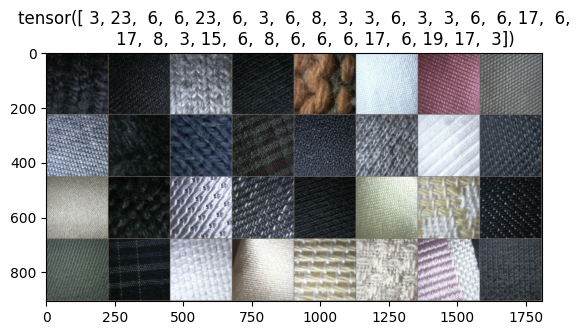

In [35]:
images_data = torchvision.utils.make_grid(images)
imshow(images_data, labels)

In [36]:
images.shape

torch.Size([32, 3, 224, 224])

## 3. 모델 불러오기

In [37]:
from torchvision.models import efficientnet_b0
import torch.nn as nn
import torch

model = efficientnet_b0(pretrained=True)
model

c:\IoLaundry\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\IoLaundry\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [38]:
# 전체 파라미터 고정
for param in model.parameters() :
    param.requires_grad = False

# classifier만 학습 가능하게
for param in model.classifier.parameters():
    param.requires_grad = True

# classifier 수정
model.fc = nn.Linear(in_features=512, out_features=24, bias=True)

## 4. 모델 학습

In [39]:
from tensorboardX import SummaryWriter
import torch.optim as optim
import tqdm

In [ ]:
writer = SummaryWriter()
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()
epochs = 20
step = 0

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

for epoch in range(epochs) :
    for data, labels in tqdm.tqdm(train_dataloader) :
        data = data.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        pred = model(data)
        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()
        
        writer.add_scalar("Loss/train", loss.item(), step)
        step += 1
    
    print(f"loss ::: {loss.item()}")

100%|██████████| 185/185 [01:16<00:00,  2.41it/s]


loss ::: 2.1111645698547363


100%|██████████| 185/185 [01:20<00:00,  2.29it/s]


loss ::: 1.639364242553711


100%|██████████| 185/185 [01:24<00:00,  2.20it/s]


loss ::: 1.2543474435806274


100%|██████████| 185/185 [01:27<00:00,  2.11it/s]


loss ::: 1.0800992250442505


100%|██████████| 185/185 [01:22<00:00,  2.25it/s]


loss ::: 1.0337061882019043


100%|██████████| 185/185 [01:26<00:00,  2.13it/s]


loss ::: 1.0505104064941406


100%|██████████| 185/185 [01:18<00:00,  2.37it/s]


loss ::: 1.0479302406311035


100%|██████████| 185/185 [01:18<00:00,  2.35it/s]


loss ::: 1.0976033210754395


100%|██████████| 185/185 [01:18<00:00,  2.36it/s]


loss ::: 0.9615584015846252


100%|██████████| 185/185 [01:21<00:00,  2.27it/s]


loss ::: 1.0746252536773682


100%|██████████| 185/185 [01:13<00:00,  2.51it/s]


loss ::: 0.7032904624938965


100%|██████████| 185/185 [01:14<00:00,  2.48it/s]


loss ::: 1.1494485139846802


100%|██████████| 185/185 [01:21<00:00,  2.28it/s]


loss ::: 1.2375019788742065


100%|██████████| 185/185 [01:19<00:00,  2.34it/s]


loss ::: 1.688652515411377


100%|██████████| 185/185 [01:16<00:00,  2.40it/s]


loss ::: 1.229522705078125


100%|██████████| 185/185 [01:17<00:00,  2.37it/s]


loss ::: 1.2096703052520752


100%|██████████| 185/185 [01:17<00:00,  2.38it/s]


loss ::: 1.7101458311080933


100%|██████████| 185/185 [01:17<00:00,  2.40it/s]


loss ::: 1.3460354804992676


100%|██████████| 185/185 [01:20<00:00,  2.31it/s]


loss ::: 1.2012982368469238


100%|██████████| 185/185 [01:25<00:00,  2.16it/s]

loss ::: 0.7867217063903809


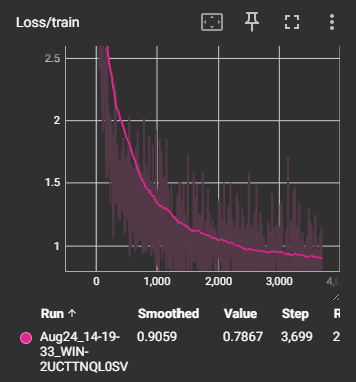

In [42]:
torch.save(model.state_dict(), "model/efficientModel_weight_2.pth")

In [43]:
torch.save(model, "model/efficientModel_full_2.pth")

## 5. 모델 평가

In [44]:
import torch
from sklearn.metrics import f1_score

In [ ]:
# 평가
model.eval()

all_preds = []
all_labels = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

with torch.no_grad() :
    total_corr = 0
    for images, labels in test_dataloader :
        images = images.to(device)
        labels = labels.to(device)

        # 3. 모델 추론
        outputs = model(images)                 # (batch_size, num_classes)
        preds = torch.argmax(outputs, dim=1)    # 가장 확률 높은 클래스로 예측

        # 4. 결과 수집 (CPU로 옮기기)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# f1 score 계산
f1_macro = f1_score(all_labels, all_preds, average="macro")         # 적은 클래스도 똑같이 반영
f1_weighted = f1_score(all_labels, all_preds, average="weighted")   # 샘플 수 비율 반영 (-> 클래스 불균형 심할때)
print(f"f1 score (macro) : {f1_macro:.4f}")
print(f"f1 score (weighted) : {f1_weighted:.4f}")

f1 score (macro) : 0.5256
f1 score (weighted) : 0.6586


In [ ]:
# 흑백으로 바꿔서도 돌려볼까?

## 6. 최종 성능평가

In [92]:
# sample 옷을 가져와 모델 최종 성능평가 진행

# 이미지 파일 불러오기
from PIL import Image

# img = Image.open("data/sweater_test.jpg").convert("RGB")
img = Image.open("data/t_shirt.jpg").convert("RGB")

In [93]:
# 이미지 전처리
img_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)
input_tensor = img_transform(img)

In [94]:
input_tensor.size()

torch.Size([3, 224, 224])

In [95]:
import os

train_dir = 'dataset/train'

class_names = sorted([
    folder_name for folder_name in os.listdir(train_dir)
    if os.path.isdir(os.path.join(train_dir, folder_name))
])

print(class_names)
print(f"총 클래스 수: {len(class_names)}")


['Acrylic', 'Artificial_fur', 'Artificial_leather', 'Blended', 'Chenille', 'Corduroy', 'Cotton', 'Crepe', 'Denim', 'Felt', 'Fleece', 'Leather', 'Linen', 'Lut', 'Nylon', 'Polyester', 'Satin', 'Silk', 'Suede', 'Terrycloth', 'Utilities', 'Velvet', 'Viscose', 'Wool']
총 클래스 수: 24


In [99]:
class_names[14]

'Nylon'

In [ ]:
# 평가
import torch.nn.functional as F
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to("cpu")

with torch.no_grad() :
    pred = model(input_tensor.unsqueeze(0))
    # print(f"예측값 : {pred}")

    pred_result = torch.argmax(pred, dim=1).item()
    softmax = nn.Softmax(dim=1)
    score = softmax(pred)[0]
    # print(f"Softmax 확률 분포 : {score}")

    confidence = float(score[pred_result])
    name = class_names[pred_result]

    print(f"예측 클래스 이름: {name}")
    print(f"예측 확률(confidence): {confidence:.4f}")

예측값 : tensor([[-0.2837, -0.3113,  0.9821,  0.3880,  1.1646,  3.1018,  1.4561,  0.5102,
         -0.8126,  2.7417,  3.3820,  2.1449, -0.8159,  2.6879,  5.5490,  2.4374,
          3.3060,  2.8398,  0.6367, -1.1603,  4.0309,  5.4829, -0.8928, -0.2899,
         -4.4003, -3.8059, -4.5054, -3.4236, -4.6012, -3.2632, -3.3807, -3.8980,
         -2.5318, -3.4947, -3.3848, -4.4589, -3.0496, -4.2597, -3.4932, -2.9798,
         -3.0466, -3.3673, -3.3416, -3.4747, -2.9223, -3.9392, -2.7620, -3.8941,
         -3.8624, -3.4469, -4.5659, -4.3169, -4.1563, -3.6998, -4.4253, -2.7858,
         -4.3627, -3.5880, -4.5868, -2.7999, -2.7870, -4.1108, -3.3972, -3.8872,
         -2.9991, -3.7294, -4.0107, -4.1285, -4.3913, -3.8335, -4.5349, -4.0539,
         -4.5809, -4.5577, -5.1985, -4.1398, -4.7285, -3.6274, -2.6416, -3.2972,
         -3.8952, -3.2392, -3.1519, -4.3301, -3.3908, -1.6062, -3.7181, -3.3904,
         -3.9228, -3.5334, -4.6186, -3.7421, -3.0758, -2.9235, -2.6798, -4.5524,
         -4.0263, -4.3

## 7. grad-cam

In [97]:
from pytorch_grad_cam import GradCAM, AblationCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

### 모델 불러오기

In [98]:
from torchvision.models import efficientnet_b0
import torch.nn as nn
import torch

model = efficientnet_b0(pretrained=False)
model

c:\IoLaundry\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\IoLaundry\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [100]:
# classifier 수정 및 가중치만저장한 모델 가져오기
model.fc = nn.Linear(in_features=512, out_features=24, bias=True)
model.load_state_dict(torch.load("model/efficientModel_weight_2.pth", map_location="cpu"))
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [101]:
# 이미지 파일 불러오기
from PIL import Image

img = Image.open("data/t_shirt.jpg")
img_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)
input_tensor = img_transform(img).unsqueeze(0)

In [102]:
input_tensor.shape

torch.Size([1, 3, 224, 224])

In [103]:
layer = model.features[7][0].block[3][0]
layer

Conv2d(1152, 320, kernel_size=(1, 1), stride=(1, 1), bias=False)

In [ ]:
targets = [ClassifierOutputTarget(14)]      # 14: Nylon

In [107]:
cam = GradCAM(model=model, target_layers=[layer])
cam.batch_size = 1
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
grayscale_cam = grayscale_cam[0, :]
grayscale_cam

array([[0.33959946, 0.33959946, 0.33959946, ..., 0.38386622, 0.38386622,
        0.38386622],
       [0.33959946, 0.33959946, 0.33959946, ..., 0.38386622, 0.38386622,
        0.38386622],
       [0.33959946, 0.33959946, 0.33959946, ..., 0.38386622, 0.38386622,
        0.38386622],
       ...,
       [0.488802  , 0.488802  , 0.488802  , ..., 0.4759138 , 0.4759138 ,
        0.4759138 ],
       [0.488802  , 0.488802  , 0.488802  , ..., 0.4759138 , 0.4759138 ,
        0.4759138 ],
       [0.488802  , 0.488802  , 0.488802  , ..., 0.4759138 , 0.4759138 ,
        0.4759138 ]], shape=(224, 224), dtype=float32)

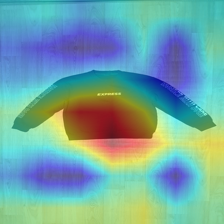

In [108]:
img = Image.open("data/t_shirt.jpg")
img.size
img = img.resize((224, 224))
rgb_img = np.float32(img) / 255
result_grad_cam = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
display(Image.fromarray(result_grad_cam))